Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment. The main components of reinforcement learning are:

1. **Agent**: The entity that learns and makes decisions.
2. **Environment**: The world in which the agent operates.
3. **State**: The current situation of the agent in the environment.
4. **Action**: A decision made by the agent.
5. **Reward**: Positive or negative feedback from the environment based on the agent's action.
6. **Policy**: The strategy the agent uses to determine its actions.

The goal of reinforcement learning is for the agent to learn an optimal policy that maximizes cumulative rewards over time. This is achieved through a process of trial and error, where the agent explores the environment, takes actions, and learns from the consequences (rewards) of those actions.

*Q-Learning*:-

---


Q-learning is a model-free RL algorithm used to find an optimal action-selection policy for finite Markov Decision Processes (MDPs).

This means that the agent does not need an understanding of the environment (model-free) to learn and act, and keeps track of the optimal actions to take in given states that it observes- best used in environments with a finite set of steps, states, and actions to take (finite MDP). Q in this case stands for "Quality"


---

*Core Concepts*:-

**Value-based learning**: Q-learning estimates the value of taking actions in states to inform decision-making.

**Exploration vs. Exploitation**: The agent must balance trying new actions (exploration) with using known good actions (exploitation).

**State-action pairs**: Instead of learning values for states alone, Q-learning considers the value of specific actions in each state.

**Iterative improvement**: Q-values are continuously updated based on new experiences, gradually improving the policy.

Code Problem Statement - Reach the Goal
For our Q-Learning example we will teach our agent to reach the goal of this 3x3 Grid. The end goal will be to create a Q-Table that stores all of the Q-Values learned through the RL training.

Q-value: Represents the expected utility of taking a specific action in a given state, this is the value kept that determines how 'useful' an action is given the current state.
Q-table: A lookup table storing Q-values for all state-action pairs, the main brains behind your agent at the end of training.

This will show, at each tile in our grid, what the best action is to take. A higher Q-Value for an action in a given state action pair represents the optimal learned action.

In [ ]:
#Our environment will be represented as x,y coordinates and some helper functions to check where we are in the grid
import numpy as np
import random
from typing import Tuple,List

#Define the grid world
GRID_SIZE=3
START=(0,0)
GOAL=(2,2)
OBSTACLE=(1,1)

#Define actions
ACTIONS=[
    (-1,0), #up
    (0,1), #right
    (1,0), #down
    (0,-1), #left
]

In [ ]:
def is_valid_state(state: Tuple[int,int]) -> bool:
  return (0<=state[0]<GRID_SIZE and
          0<=state[1]<GRID_SIZE and
          state!=OBSTACLE)

In [ ]:
def get_next_state(state:Tuple[int,int],action:Tuple[int,int])->Tuple[int,int]:
  next_state=(state[0]+action[0],state[1]+action[1])
  return next_state if is_valid_state(next_state) else state

In [ ]:
#Define Q-Learning Parameters:
EPSILON=0.3
ALPHA=0.3
GAMMA=0.99
EPISODES=10000

1. **EPSILON (ε) = 0.3**

This is the exploration rate.
It determines the probability of the agent choosing a random action instead of the best known action.
With EPSILON = 0.3, the agent will explore (choose a random action) 30% of the time and exploit (choose the best known action) 70% of the time.
This balance helps the agent discover new potentially better paths while also utilizing what it has learned.

2. **ALPHA (α) = 0.3**

This is the learning rate.
It determines how much the agent values new information compared to existing information.
With ALPHA = 0.3, the agent will incorporate 30% of the new information and retain 70% of the old information when updating Q-values.
A higher value makes the agent adapt more quickly to new information, while a lower value makes it more conservative.

3. **GAMMA (γ) = 0.99**

This is the discount factor.
It determines how much the agent values future rewards compared to immediate rewards.
With GAMMA = 0.99, future rewards are valued at 99% of their actual value.
A value close to 1 (like 0.99) means the agent cares almost as much about long-term rewards as short-term rewards.
This encourages the agent to consider long-term consequences of its actions.

4. **EPISODES = 10000**

This is the number of training episodes.
Each episode represents one complete run through the environment, from the start state to a terminal state (either reaching the goal or a maximum number of steps).
10,000 episodes give the agent many opportunities to explore the environment and learn the optimal policy.
EPSILON ensures a balance between exploration and exploitation.
ALPHA controls how quickly the agent adapts to new information.
GAMMA encourages the agent to consider long-term rewards.
EPISODES determines how many chances the agent gets to learn.


---


*Creating Agent Rewards*:-  

In RL, rewards are scalar feedback signals that indicate how well the agent is doing at a given time step. It's essentially the agent's way of understanding whether its actions are good or bad in terms of achieving its goal. Generally, reinforcement learning algorithms attempt to learn to maximize the reward gained.

Our primary objective here is to reach the goal tile, so we want to setup some reward that rewards doing that, and penalizes making incorrect moves like hitting walls or obstacles. As a secondary objective, we also want to find the most efficient path.

In get_reward we return a positive reward of 100 if we have reached the goal, and a penalty (negative reward) of -10 for hitting a wall or obstacle for our primary objective. To ensure an efficient path, we have a small penalty for each step taken.

The specific values (100, -10, -1) are somewhat arbitrary and can be adjusted. What's important to focus on here is the relative differences between these values. Reaching the goal should be much more rewarding than the penalty for a single step, and hitting an obstacle should be more punishing than taking an extra step.

In [ ]:
def get_reward(state:tuple[int,int],next_state:Tuple[int,int])->int:
  if next_state==GOAL:
    return 100
  elif next_state==OBSTACLE or next_state==state:
    return -10
  else:
    return -1

*Choosing an Action - Exploration vs Exploitation*:-


---


In choose_action, our first parameter ε is implemented!

The line if random.uniform(0, 1) < EPSILON generates a random number 0 to 1, and compares it to our epsilon of 0.3. This implements the ε-greedy strategy: with probability EPSILON, the agent will explore; otherwise, it will exploit (or choose the best known action).

If the random number is less than EPSILON, the function returns a random action from the ACTIONS list, and if the random number is greater than or equal to EPSILON, the function chooses the action with the highest Q-value for the current state.

Balancing exploration and exploitation ensures the agent doesn't always choose the best known action (which could lead to getting stuck in suboptimal solutions) or always choose randomly (which would prevent learning). This allows for continuous learning- even when the agent has learned a good policy, the occasional random actions allow it to potentially find even better solutions.
With an epsilon of 0.3, we will take a random action 30% of the time, and exploit the best known action 70% of the time

In [ ]:
def choose_action(state: Tuple[int,int], q_table:np.ndarray)->Tuple[int,int]:
  if random.uniform(0,1)<EPSILON:
    return random.choice(ACTIONS)
  else:
    return ACTIONS[np.argmax(q_table[state])]

*Updating Q-Value Learning & The Bellman Equation*:-

The Q-Values themselves that constitute which action in a state-action pair is the best to take are determined based on multiple factors, calculated using the Bellman Equation:
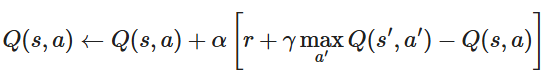

Where:

1. Q(s, a) q_table[state][action_idx]: The Q-value for taking action (a) in state (s).
2. α ALPHA: Learning rate, controlling how much the new information overrides the old.
3. (r) reward: Reward received after taking action (a).
4. γ GAMMA: Discount factor, determining the importance of future rewards.
5. (s') next_state: The next state after taking action (a).
6. maxQ(s', a')) np.max(q_table[next_state]): Maximum expected future reward for the next state (s').

This is where the actual learning happens in Q-learning and the agent updates its understanding of the Q-value of actions in different states.

In [ ]:
def update_q_table(q_table:np.ndarray,state:Tuple[int,int],action:Tuple[int,int],
                   reward:int,next_state:Tuple[int,int])->None:
    action_idx=ACTIONS.index(action)
    q_table[state][action_idx]+=ALPHA*(reward+GAMMA*np.max(q_table[next_state])-q_table[state][action_idx])

**Gamma** as the discount factor:

* If GAMMA = 1: Future rewards would be
valued equally to immediate rewards. The agent would care just as much about rewards far in the future as it does about immediate rewards.
* If GAMMA = 0: The agent would only care about immediate rewards and ignore future rewards completely.
* With GAMMA = 0.99: Future rewards are valued at 99% of their actual value. This means the agent cares a lot about future rewards, but slightly less than immediate rewards.

**ALPHA** as the learning rate:

* If ALPHA = 1: The old Q-value would be completely replaced by the new estimate. This would result in very rapid learning, but also high volatility and potential instability.
* If ALPHA = 0: The Q-value would never update, and no learning would occur.
* With ALPHA = 0.3: The Q-value is updated by moving 30% of the way toward the new estimate.
  * If the new estimate is higher than the old Q-value, the Q-value will increase, but only by 30% of the difference.
  * If the new estimate is lower than the old Q-value, the Q-value will decrease, but only by 30% of the difference.

**Training Script**


---


The main agent training script returns the learned Q-Table by following these steps:

  1. Create an empty (zeroed) table the same size as the environment, 3x3 in our example case
  2. Start the current state at the starting point, (0, 0)
  3. Choose an action to take based on the current state and the Q-Table
  4. Determine the next state based on the action chosen and the current state
  5. Calculate the reward based on the action taken
  6. Update the Q-Table for the current state-action pair based on the reward and the next state
  7. Move to the next state for the next iteration of the loop and repeat until the goal is reached
  8. Repeat this process for how many episodes chosen, 10,000
  
Finally, the Q-Table is returned which will outline the best moves to make for the given objective!

In [ ]:
def train_agent()->np.ndarray:
  q_table=np.zeros((GRID_SIZE,GRID_SIZE,len(ACTIONS)))

  for _ in range(EPISODES):
    state=START
    while state!=GOAL:
      action=choose_action(state,q_table)
      next_state=get_next_state(state,action)
      reward=get_reward(state,next_state)
      update_q_table(q_table,state,action,reward,next_state)
      state=next_state
  return q_table

#Train Agent
q_table=train_agent()

In [ ]:
q_table

array([[[ 83.119202,  94.0598  ,  94.0598  ,  83.119202],
        [ 85.0598  ,  96.02    ,  85.0598  ,  92.119202],
        [ 87.02    ,  87.02    ,  98.      ,  94.0598  ]],

       [[ 92.119202,  85.0598  ,  96.02    ,  85.0598  ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [ 96.02    ,  89.      , 100.      ,  89.      ]],

       [[ 94.0598  ,  98.      ,  87.02    ,  87.02    ],
        [ 89.      , 100.      ,  89.      ,  96.02    ],
        [  0.      ,   0.      ,   0.      ,   0.      ]]])

In [ ]:
def visualize_q_table_as_grid(q_table: np.ndarray) -> None:
    """Visualize the Q-table as a grid with all action values for each state."""
    action_symbols = ['^', '>', 'v', '<']

    print("\nDetailed Q-table Grid:")

    # Header
    header = "   |" + "|".join(f"   ({i},{j})   " for i in range(GRID_SIZE) for j in range(GRID_SIZE)) + "|"
    print(header)
    print("-" * len(header))

    for action_idx, action_symbol in enumerate(action_symbols):
        row = f" {action_symbol} |"
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == GOAL:
                    cell = "   GOAL    "
                elif (i, j) == OBSTACLE:
                    cell = " OBSTACLE  "
                else:
                    q_value = q_table[i, j, action_idx]
                    cell = f" {q_value:9.2f} "
                row += cell + "|"
        print(row)
        print("-" * len(header))

def visualize_best_actions_grid(q_table: np.ndarray) -> None:
    """Visualize the best action and its Q-value for each state in a grid."""
    action_symbols = ['^', '>', 'v', '<']

    print("\nBest Actions Grid:")
    header = "-" * (14 * GRID_SIZE + 1)
    print(header)

    for i in range(GRID_SIZE):
        row = "| "
        for j in range(GRID_SIZE):
            if (i, j) == GOAL:
                cell = "   GOAL    "
            elif (i, j) == OBSTACLE:
                cell = " OBSTACLE  "
            else:
                best_action_idx = np.argmax(q_table[i, j])
                best_q_value = q_table[i, j, best_action_idx]
                cell = f"{action_symbols[best_action_idx]}:{best_q_value:7.2f}  "
            row += cell + " | "
        print(row)
        print(header)

In [ ]:
# Visualize the Q-table as a grid
visualize_q_table_as_grid(q_table)

# Visualize the best actions and their Q-values in a grid
visualize_best_actions_grid(q_table)


Detailed Q-table Grid:
   |   (0,0)   |   (0,1)   |   (0,2)   |   (1,0)   |   (1,1)   |   (1,2)   |   (2,0)   |   (2,1)   |   (2,2)   |
----------------------------------------------------------------------------------------------------------------
 ^ |     83.12 |     85.06 |     87.02 |     92.12 | OBSTACLE  |     96.02 |     94.06 |     89.00 |   GOAL    |
----------------------------------------------------------------------------------------------------------------
 > |     94.06 |     96.02 |     87.02 |     85.06 | OBSTACLE  |     89.00 |     98.00 |    100.00 |   GOAL    |
----------------------------------------------------------------------------------------------------------------
 v |     94.06 |     85.06 |     98.00 |     96.02 | OBSTACLE  |    100.00 |     87.02 |     89.00 |   GOAL    |
----------------------------------------------------------------------------------------------------------------
 < |     83.12 |     92.12 |     94.06 |     85.06 | OBSTACLE  |     89.

While Q-tables are excellent for smaller, discrete state-action spaces, many real-world applications involve large or continuous state spaces. In such cases, more advanced techniques like Deep Q-Networks (DQN) or other deep reinforcement learning methods are often used, which build upon the principles of Q-learning but use neural networks to approximate the Q-function instead of a table.

*Deep Q-Networks*:


---
The main issue with Q-Learning is that it is tabular and non-scalable for more complex environments. When dealing with a limited and finite set like our grid example above, basic Q-Learning worked great since we could easily cover all possible state-action pairs, but when it comes to applying reinforcement learning to more complex environments where this is not realistic- we need to find ways to best estimate the Q-Values of a state.

This is where Deep Q-Networks are introduced! Instead of having a defined lookup table, we can employ neural network estimation to learn to estimate and generalize actions at different states in an environment, being able to even learn continuous states.


*Problem Statement:-Balancing a Pole*
We'll be using gymnasium, a library with standardized reinforcement learning environments for testing and learning

Within this environment, we have two actions for the cart:

Moving Left (0)
Moving Right (1)
With the state observations:

Cart Position: -4.8 to 4.8
Cart Velocity: -inf to inf
Pole Angle: -24° to 24°
Pole Angular Velocity: -inf to inf
And termination conditions:

Termination: Pole Angle > ±12°
Termination: Cart Position > ±2.4
Truncation: Episode length > 500

With the objective being to balance the pole as long as possible- thus the reward will be +1 per step

So as we can see, an infinite combination of state-action observations, something we could definitely not tackle with traditional Q-Learning approaches!

In [ ]:
import numpy as np
import random
from collections import deque
import gymnasium as gym
import tensorflow as tf
from tensorflow.keras import Model, layers
import os

In [ ]:
#Creating the environment
env=gym.make('CartPole-v1')

state_size=env.observation_space.shape[0]
action_size=env.action_space.n

print("State Size:",state_size)
print("Action Size:",action_size)

State Size: 4
Action Size: 2


Our model will consist of 4 total layers:

 * It takes in 4-dimensional state information of cart position, cart velocity, pole angle, and pole angular velocity
 * Processes it through two hidden layers, each with 24 neurons
 * Outputs 2 values, representing the Q-values for the two possible actions of moving left or right

This gives us a whopping 770 trainable parameters to learn the environment and refine our predictions!

In [ ]:
class DQN(Model):
  def __init__(self,action_size,**kwargs):
    super(DQN,self).__init__(**kwargs)
    self.action_size=action_size
    self.d1=layers.Dense(24, activation='relu', name='d1')
    self.d2=layers.Dense(24, activation='relu',name='d2')
    self.d3=layers.Dense(action_size,activation='linear',name='d3')

  def call(self,x):
    x=self.d1(x)
    x=self.d2(x)
    return self.d3(x)

  #Configs for loading the saved model file later on
  def get_config(self):
    config=super(DQN,self).get_config()
    config.update({"action_size":self.action_size})
    return config

  @classmethod
  def from_config(cls,config):
    return cls(**config)

*Creating the Agent*:-


---


Now that we're working with a more advanced approach, our agent becomes a little more complicated. Let's break it down and, and all of the different techniques being used here

The first technique we'll implement is Experience Replay. This memory stores tuples of (state, action, reward, next_state, done), representing the agent's experiences. The DQN algorithm samples randomly from this memory during training, which helps to break the correlation between consecutive samples and stabilizes learning.

The process works as such:

 1. As the agent interacts with the environment, it stores each experience tuple (state, action, reward, next_state, done) in the replay memory
 2. During training, instead of using the most recent experience, the agent randomly samples a batch of experiences from the memory.
 3. The agent then uses this batch to update its Q-network, computing the loss and performing a gradient descent step.

This is beneficial because in a typical RL setting consecutive experiences are often highly correlated, so random sampling breaks these correlations, reducing the variance of updates and preventing the network from overfitting to recent experiences. As a plus each experience can be used multiple times for learning, making the learning process more data-efficient. In short, rather than updating the network after every single action, it updates based on a batch of experiences.

In our Agent class that we are about to introduce, we store these replays using remember(), and it comes back in replay() where we sample a batch of replays using minibatch = random.sample(memory, batch_size) for training on.

In [ ]:
#Replay memory deque
memory=deque(maxlen=2000)

In [ ]:
class Agent:
    def __init__(self, state_size, action_size, gamma=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, learning_rate=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate

        #main network
        self.model = self._build_model()
        #target network
        self.target_model = self._build_model()
        self.update_target_model()

        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)

    def _build_model(self):
        return DQN(self.action_size)

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model(np.array([state]))
        return np.argmax(q_values[0].numpy())

    def save_model(self, filepath):
        self.model.save(filepath)

    def load_model(self, filepath):
        # Load the saved model from the specified filepath
        self.model = tf.keras.models.load_model(filepath, custom_objects={"DQN": DQN})
        self.target_model = tf.keras.models.load_model(filepath, custom_objects={"DQN": DQN})

    def replay(self, batch_size):
        minibatch = random.sample(memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            with tf.GradientTape() as tape:
                q_values = self.model(np.array([state]), training=True)
                q_value = q_values[0][action]

                if done:
                    target = reward
                else:
                    next_action = np.argmax(self.model(np.array([next_state]))[0].numpy())
                    t = self.target_model(np.array([next_state]))[0][next_action]
                    target = reward + self.gamma * t

                loss = tf.reduce_mean(tf.square(target - q_value))

            grads = tape.gradient(loss, self.model.trainable_variables)
            self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

*Q-Target Stabilization*:-


---


During the initialization phase, we create two networks, a main network and a target_model:

# Main network
self.model = self._build_model()
# Target network
self.target_model = self._build_model()
self.update_target_model()

In basic Q-Learning, we used the Bellman Equation to update our Q-Values. However, with DQN, we use a neural network to approximate Q-values. This leads to a moving target problem:

The same network is used to compute both
 and
.
As we update the network, both these values change, leading to instability.
To address this, we introduce a separate Target Network, commonly referred to as the Q-Target:-
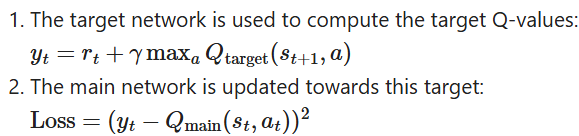

Now that our Q-Values are approximated instead of kept strictly in a table, we improve our accuracy by updating our neural network weights through regular model training techniques. We use the target network's output to create a stable learning target.

In this context, the target is our estimate of the total future reward for taking a particular action in a particular state. It's essentially the value we want our estimate to move towards, or our best guess of the true value we're trying to learn.

This is implemented in the training loop via:

next_action = np.argmax(self.model(np.array([next_state]))[0].numpy())
t = self.target_model(np.array([next_state]))[0][next_action]
target[0][action] = reward + self.gamma * t

The target network is then only updated every n steps or episodes. This allows the targets to eventually reflect the improved knowledge of the main network, but in a more controlled, step-wise manner. We will update it every 5 episodes in our training later on

def update_target_model(self):
    # Copy weights from main model to target model
    self.target_model.set_weights(self.model.get_weights())

Using a target network gives us the benefits of:
  * Stability: By keeping the target values stable for a period, it reduces the moving target problem.
  * Reduced Correlations: It helps break the correlation between the predicted Q-values and the target.
  * Smoother Learning: The periodic updates create a stepwise learning process, which can be more stable than continuous updates.

**Math Time!** Here's how the Bellman equation is slightly modified to include this:

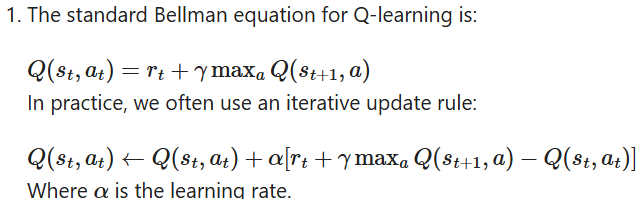

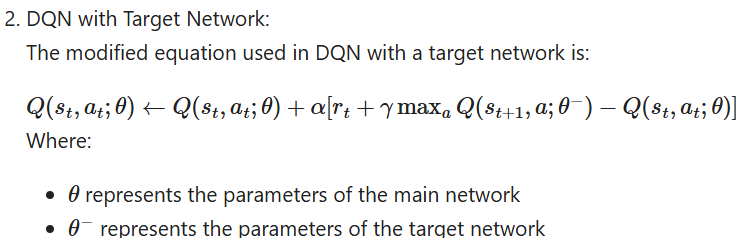

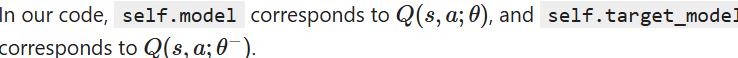

Using the Target Model for Double DQN
A very small but powerful third concept is being applied here as well within the Q-Target stabilization, Double DQN.

In standard Q-learning and DQN training, we use the same values to both select and evaluate actions, i.e. using the model being trained to select an action for the given state, and estimating the expected future reward (which is the Q-Value of the selected action).

But when we use the same function for both selection and evaluation, we can end up overestimating the true value of actions because:

 1. If our Q-value estimates have any noise (common in early training), we're more likely to select actions that have been overestimated by chance.
 2. We then use these same potentially overestimated values to evaluate how good the action is and update our Q-function, which can propagate and amplify the overestimation.

This can lead to overoptimistic value estimates and amplifying false-positives unintentionally. Double DQN decouples the action selection from the action evaluation. The key idea is to use one set of parameters to choose the best action and another to evaluate it, which in our case will be the base model and the target model.

Essentially:

 * The DQN network estimates the best action to take for the next state.
 * Then the Target network estimates the target Q-Value of taking that action in the next state.
 * Finally these are put into the bellman equation to update our Q-Value calculation/Network

We implement this in the replay() function:

next_action = np.argmax(self.model(np.array([next_state]))[0].numpy())
t = self.target_model(np.array([next_state]))[0][next_action]
target[0][action] = reward + self.gamma * t

where:
  * np.argmax(self.model(np.array([next_state]))[0].numpy()) is using the main network (self.model) to select the best action.
  * self.target_model(np.array([next_state]))[0][next_action] is using the target network (self.target_model) to evaluate the Q-value of the action selected by the main network.

The benefits of this then are:
  
  * **Reduced Overestimation**: By using two networks, we're less likely to propagate noise as value. If one network overestimates value, the other can compensate.
  * **More Stable Learning**: The separation of selection and evaluation creates a more stable learning target.
  * **Improved Exploration**: The discrepancy between the two networks can implicitly encourage exploration.
  * **Better Generalization**: The reduced overestimation can lead to better generalization to unseen states.

In [ ]:
#DQN Training
batch_size = 32           # Number of samples used for each training step
n_episodes = 500          # Total number of episodes to train on
gamma = 0.95              # Discount factor for future rewards (0 to 1)
epsilon = 1.0             # Initial exploration rate (1 = 100% random actions)
epsilon_min = 0.01        # Minimum exploration rate
epsilon_decay = 0.995     # Decay factor for epsilon after each episode
learning_rate = 0.001     # Step size for neural network weight updates
update_target_every = 5   # Number of episodes between target network updates

In [ ]:
import os

output_dir='./catpole_model/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize the Agent
agent = Agent(state_size, action_size, gamma=gamma, epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, learning_rate=learning_rate)
done = False

# Main Script
for e in range(n_episodes):
    state = env.reset()[0]
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    for time_t in range(500):
        action = agent.act(state[0])
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state[0], action, reward, next_state[0], done)
        state = next_state
        total_reward += reward

        if done:
            print(f"Episode: {e}/{n_episodes}, Score: {time_t}, Epsilon: {agent.epsilon:.2f}")
            break

    if len(memory) > batch_size:
        loss = agent.replay(batch_size)

    # Update epsilon
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

    # Update target network
    if e % update_target_every == 0:
        agent.update_target_model()


    if e % 100 == 0:
        agent.save_model(os.path.join(output_dir, f'model_{e}.keras'))

agent.save_model(os.path.join(output_dir, f'model_500.keras'))

Episode: 0/500, Score: 44, Epsilon: 1.00
Episode: 1/500, Score: 13, Epsilon: 0.99
Episode: 2/500, Score: 15, Epsilon: 0.99
Episode: 3/500, Score: 10, Epsilon: 0.99
Episode: 4/500, Score: 36, Epsilon: 0.98
Episode: 5/500, Score: 40, Epsilon: 0.98
Episode: 6/500, Score: 16, Epsilon: 0.97
Episode: 7/500, Score: 21, Epsilon: 0.97
Episode: 8/500, Score: 9, Epsilon: 0.96
Episode: 9/500, Score: 16, Epsilon: 0.96
Episode: 10/500, Score: 20, Epsilon: 0.95
Episode: 11/500, Score: 13, Epsilon: 0.95
Episode: 12/500, Score: 21, Epsilon: 0.94
Episode: 13/500, Score: 32, Epsilon: 0.94
Episode: 14/500, Score: 43, Epsilon: 0.93
Episode: 15/500, Score: 23, Epsilon: 0.93
Episode: 16/500, Score: 21, Epsilon: 0.92
Episode: 17/500, Score: 19, Epsilon: 0.92
Episode: 18/500, Score: 38, Epsilon: 0.91
Episode: 19/500, Score: 17, Epsilon: 0.91
Episode: 20/500, Score: 17, Epsilon: 0.90
Episode: 21/500, Score: 27, Epsilon: 0.90
Episode: 22/500, Score: 12, Epsilon: 0.90
Episode: 23/500, Score: 24, Epsilon: 0.89
Epi

In [ ]:
#Evaluation
#We can load our model now using pure exploitation of its learned policy and see if
#its able to complete (get 500 reward or balance the pole) the environment!

def render_episode(agent, model_path, num_episodes=1):
    # Load the model
    agent.load_model(model_path)

    env = gym.make('CartPole-v1', render_mode='human')
    for episode in range(num_episodes):
        state, _ = env.reset()
        state = state.reshape(1, -1)
        done = False
        total_reward = 0
        while not done:
            env.render()
            action = agent.act(state)
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = next_state.reshape(1, -1)
            total_reward += reward
            state = next_state
            if truncated:
                done = True
        print(f"Episode {episode + 1} reward: {total_reward}")
    env.close()

# Initializing saved model
state_size = 4
action_size = 2
agent = Agent(state_size, action_size)
agent.epsilon = 0.0  # 0.0 for pure exploitation

# Load the model and render episodes
model_path = "./catpole_model/model_500.keras"
# model_path = "./cartpole_model/DQN_old.keras"
render_episode(agent, model_path, num_episodes=2)

Episode 1 reward: 136.0
Episode 2 reward: 156.0


 * **Blue** is when the cart moves left
 * **Red** is when the cart moves right
 * When the pole angle is slightly negative (leaning left) and the pole velocity is negative, the agent often chooses to move left.
 * When the pole angle and velocity are both positive, the agent typically moves right.

The boundary between the two actions is smooth, which suggests that the policy is stable and the agent has learned a generalizable decision-making rule.

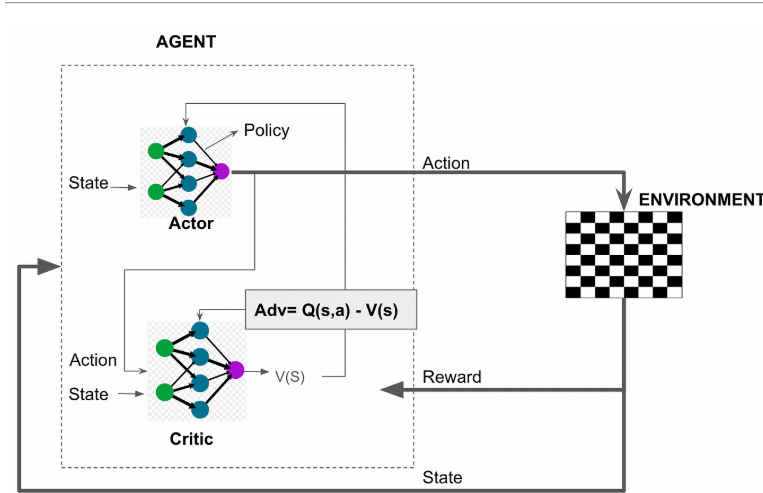

Up until now, both Q-Learning and DQN have been examples of what's called **value-based methods**, meaning that they focus on calculating or estimating the value of state-action pairs. Essentially, they learn to estimate how good it is to be in a particular state or to take a specific action in a state, thus creating a value function. The policy (what action to take) is then derived from this value function, typically by choosing the action with the highest estimated value.

Alternatively, we can use **policy-based methods**, which attempt to learn the policy directly without the intermediate step of calculating values. For a quick sporty example:

 * With value-based methods, you'd be telling the agent: "Standing here with the ball is worth 5 points, but standing there is worth 2 points." The agent then figures out what to do based on these values.
 * With policy-based methods, you're directly teaching the agent: "When you're here with the ball, shoot it. When you're there, pass it." You're learning the actions to take, not the values of states.

Both approaches aim to maximize the expected return, but policy-based methods can have advantages in certain scenarios, such as handling continuous action spaces or maintaining more stable performance in some environments.

To introduce this concept and highlight our third method, we'll take a look at **Proximal Policy Optimization (PPO)**. PPO is a policy-based method that uses gradient ascent to directly optimize the policy, aiming to find the best set of actions to take in different states.



#Proximal Policy Optimization (PPO)
To Summarize:

**Q-Learning**

 * Learns a Q-value function that estimates the expected return for each state-action pair.
 * Uses a table to store Q-values for each state-action pair.
 * Policy is derived from Q-values (e.g., epsilon-greedy).

**Deep Q-Network (DQN)**

 * Also learns a Q-value function, but uses a neural network to approximate it.
 * Can handle high-dimensional state spaces.
 * Policy is still derived from Q-values.
And to Expand:

**Proximal Policy Optimization (PPO)**
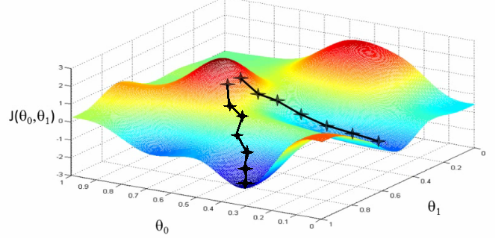

* **Directly learns a policy using gradient ascent to maximize reward.**
  * Unlike value-based methods, PPO optimizes the policy directly without the intermediate step of learning Q-values.
  * It iteratively updates policy parameters in the direction that increases expected reward.
* **Uses a "surrogate" objective function to update the policy.**
  * This function compares the likelihood of actions under the new policy versus the old policy.
  * It's multiplied by an estimate of the advantage (how much better an action is compared to the average).
* Employs a clipping mechanism to limit the size of policy updates.
  * This is where the term "proximal" comes from - it restricts how much the policy can change in a single update.
  * This promotes stability and prevents drastic policy shifts that could lead to performance collapse.
* Uses an Actor-Critic architecture, including a value function estimate (Critic) to reduce variance in policy gradients.
  * The Actor (policy) determines action selection.
  * The Critic (value function) aids in estimating the quality of actions and states.
* Works with probability distributions instead of Q-tables or deterministic values.
  * Unlike Q-learning or DQN which output single values for actions, PPO produces a distribution over actions.
  * This allows for more nuanced policies, especially in complex or continuous action spaces.
  * The probabilistic approach enables better handling of uncertainty and exploration-exploitation trade-offs.

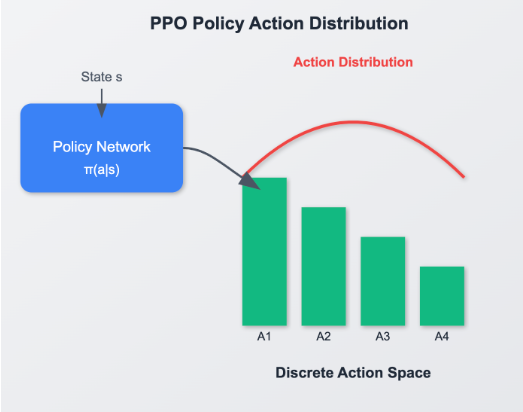

PPO aims to optimize the policy directly while ensuring that new policies don't deviate too much from old ones. This approach promotes stable learning and avoids catastrophic drops in performance, while the use of probability distributions allows for more flexible and adaptive policies in complex environments.

*Problem Statement- Pong!":-


---

Pong has an action space of 6 possible actions:

  * 0: NOOP (No operation, the paddle does not move)
  * 1: FIRE (This is typically the action to start the game or serve the ball)
  * 2: RIGHT (Move the paddle right)
  * 3: LEFT (Move the paddle left)
  * 4: RIGHTFIRE (Move the paddle right and fire at the same time)
  * 5: LEFTFIRE (Move the paddle left and fire at the same time)

And an interesting concept, our environment observation will actually be the image, so we need to implement some image processing methods. As a base the environments can be observed as a 210x160 pxl image with 3 color channels, and each pixel represented by a 0 to 255 value for. This will of course all be represented numerically for neural network processing.

**Rewards** are calculated such that you get points for getting the ball to pass the opponent’s paddle and you lose points if the ball passes your paddle

To instantiate and train this model, we'll be using the useful package stable_baselines3

In [ ]:
#!pip install stable_baselines3
#!pip install ale-py
#!pip install gym[atari,accept-rom-license]
!pip install wandb

In [ ]:
import wandb
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
from stable_baselines3.common.callbacks import CheckpointCallback

from wandb.integration.sb3 import WandbCallback

import ale_py

gym.register_envs(ale_py)

config = {
    "env_name": "PongNoFrameskip-v4",
    "num_envs": 8,
    "total_timesteps": int(10e6),
    "seed": 42,
}

run = wandb.init(
    project="PPO_Pong",
    config = config,
    sync_tensorboard = True,
    monitor_gym = True,
    save_code = True,
    )

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: somyaban17 (somyaban17-thapar-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py:258: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}
/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py:258: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}


As we'll be using a convolutional neural network, which are designed specifically for image feature extraction, we need to do some preprocessing of the game environment, specifically rescaling and normalizing the frames, and stacking them together.

#Preprocessing Frames

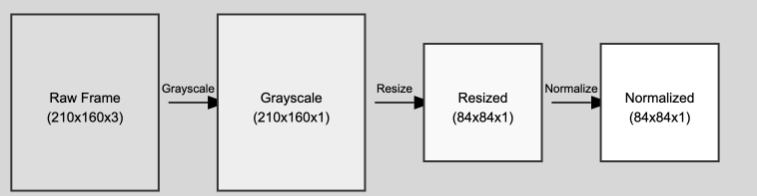

The preprocessing step follows:

  1. The raw frame is in RGB format (210x160x3). We convert it to greyscale which reduces the color channels from 3 to 1, simplifying the input.
  2. The grayscale image is resized to 84x84 pixels
  3. The pixel values are normalized by dividing by 255.0 which scales all pixel values to be between 0 and 1

This process simplifies the data input for our neural network while maintaining the main features allowing us to still learn from this representation.

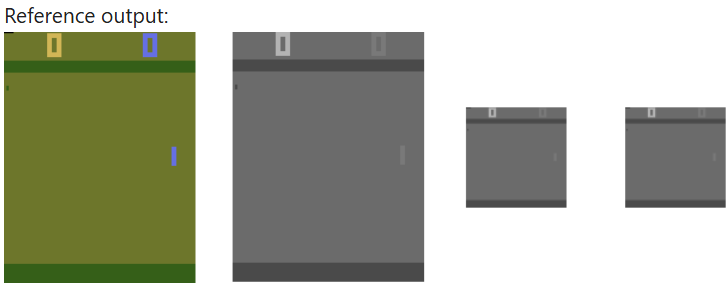

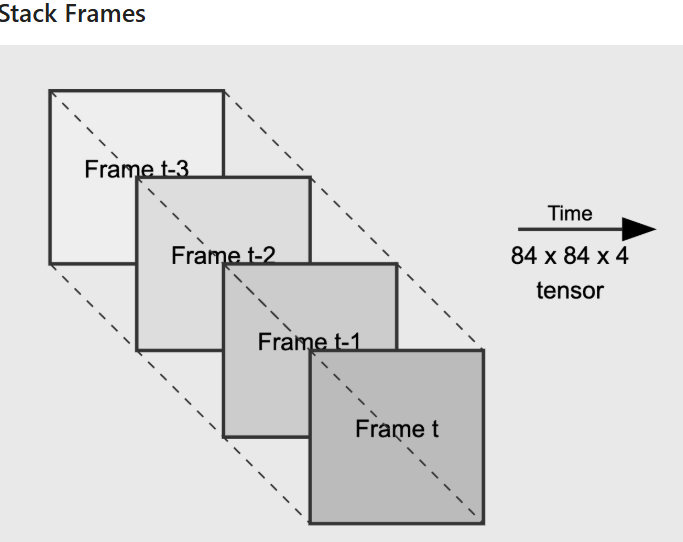

Instead of using a single frame as input, we stack multiple consecutive frames to allow the network to infer motion and direction of the ball and paddles.

The frame stacking follows:
1. Fill a deque with 4 copies of the initial preprocessed frame.
2. For each subsequent step, we preprocess the new frame and add it to the deque.
3. Stack these 4 frames along a new axis, creating a 84x84x4 tensor.

Adding this dimensionality allows us to:
1. **Capture motion**: By having multiple consecutive frames, the network can infer the direction and speed of moving objects (like the ball).
2. **Deal with partial observability**: A single frame might not contain all necessary information (e.g., the ball might be temporarily hidden behind a paddle).
3. **Provide Temporal context**: It provides a short history of the game state

This is all a good input for Convolutional Neural Networks!

Our initial state can kind of be visualized then like:
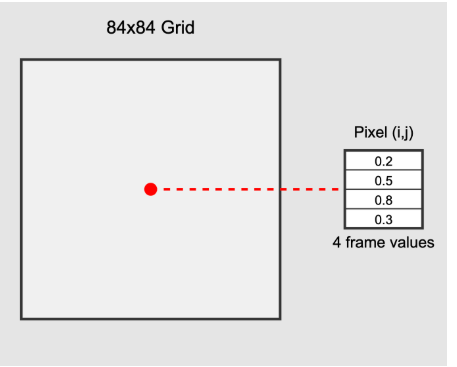

In [ ]:
#Creating the Environment & Loading Frame Stacking
env=make_atari_env(config["env_name"],n_envs=config["num_envs"],seed=config["seed"]) #PongNoFrameskip-v4

print("Environmrnt Action Space: ",env.action_space.n)

#Frame-stacking with 4 frames
env=VecFrameStack(env,n_stack=4)

Environmrnt Action Space:  6


####PPO Model Architecture
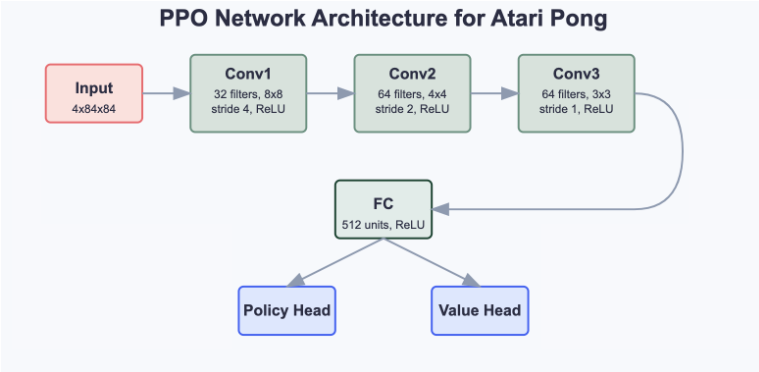

This architecture has:

- Three convolutional layers to process the visual input.
- A dense layer to further process the flattened convolutional output.
- An actor head that outputs action probabilities (policy).
- A critic head that estimates the state value.

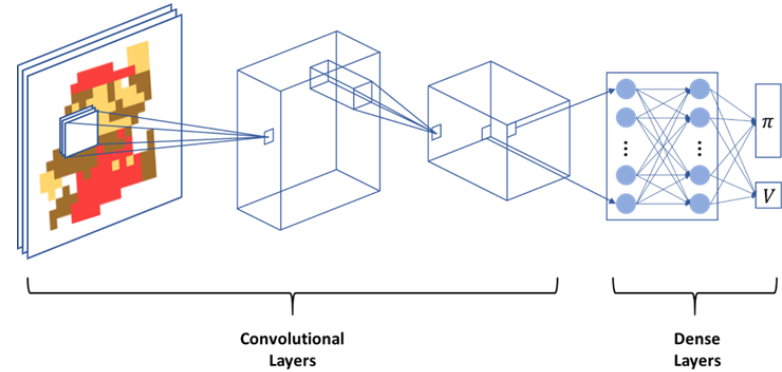

Our goal for this model is to use the **objective function** to maximize the expected advantage while preventing large policy changes.

**The first part is the clipped surrogate objective function:**

$L(\theta) = \hat{\mathbb{E}}[\min(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t)]$

This is the core of PPO, let's go through each component:

1. $L(\theta)$: This is the function we're trying to maximize, where $\theta$ represents the parameters of the policy network.

2. $\hat{\mathbb{E}}[...]$: This denotes the empirical expectation (average) over a batch of sampled data.

3. $r_t(\theta)$: This is the probability ratio between the new and old policies:
   $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}$
   where $\pi_\theta$ is the current policy and $\pi_{\theta_{old}}$ is the old policy.

4. $\hat{A}_t$: This is the estimated advantage at time t. It measures how much better an action is compared to the average action in that state.

5. $\text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)$: This function clips the ratio $r_t(\theta)$ to be between $1-\epsilon$ and $1+\epsilon$, where $\epsilon$ is a small number (often 0.1 or 0.2).

6. $\min(...)$: This takes the minimum of two terms.

The full PPO objective then includes three components:
1. The clipped surrogate objective
2. A value function loss
3. An entropy bonus

**The complete PPO objective can be written as:**

$L(\theta) = \hat{\mathbb{E}}[L^{CLIP}(\theta) - c_1 L^{VF}(\theta) + c_2 S[\pi_\theta](s)]$

Where:

1. $L^{CLIP}(\theta)$ is the clipped surrogate objective:  
   $L^{CLIP}(\theta) = \min(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t)$

2. $L^{VF}(\theta)$ is the value function loss:  
   This is typically a mean squared error between the value function predictions and the actual returns. It can be written as:
   $L^{VF}(\theta) = (V_\theta(s_t) - V^{target}_t)^2$

3. $S[\pi_\theta](s)$ is the entropy of the policy:  
   This encourages exploration by favoring policies that maintain some randomness.

4. $c_1$ and $c_2$ are coefficients that balance the importance of the value function loss and entropy bonus respectively.

The inclusion of the value function loss helps train the critic, improving the accuracy of the advantage estimates. The entropy term helps prevent premature convergence to deterministic policies, maintaining exploration.

#### Creating the PPO Model

In [ ]:
model=PPO(policy="CnnPolicy",
          env = env,
            batch_size = 256,
            clip_range = 0.1,
            ent_coef = 0.01,
            gae_lambda = 0.9,
            gamma = 0.99,
            learning_rate = 2.5e-4,
            max_grad_norm = 0.5,
            n_epochs = 4,
            n_steps = 128,
            vf_coef = 0.5,
            tensorboard_log = f"runs",
            verbose=1,
          )

Using cuda device
Wrapping the env in a VecTransposeImage.


Reiterating the core PPO objective function:

$$L(\theta) = \hat{\mathbb{E}}[\min(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t)]$$

1. **`clip_range = 0.1`**:
   - Represents $\epsilon$ in the equation
   - Limits policy updates to prevent large changes

2. **`ent_coef = 0.01`**:
   - Adds an entropy bonus: $L(\theta) += \text{ent\_coef} \cdot S[\pi_\theta](s)$
   - Encourages exploration by rewarding higher entropy policies

3. **`gae_lambda = 0.9` and `gamma = 0.99`**:
   - Used in Generalized Advantage Estimation (GAE):
     $\hat{A}_t = \delta_t + (\gamma\lambda)\delta_{t+1} + \dots + (\gamma\lambda)^{T-t+1}\delta_{T-1}$
   - $\gamma$: Discount factor for future rewards
   - $\lambda$: Controls bias-variance tradeoff in advantage estimation

4. **`learning_rate = 2.5e-4`**:
   - Step size for updating policy parameters $\theta$

5. **`max_grad_norm = 0.5`**:
   - Clips gradient norm to stabilize training:
     $\nabla_\theta' = \text{clip}(\nabla_\theta, -0.5, 0.5)$

6. **`n_epochs = 4`**:
   - Number of optimization passes over the same data

7. **`n_steps = 128`**:
   - Number of environment steps collected before each update

8. **`vf_coef = 0.5`**:
   - Weighs the value function loss:
     $L(\theta) -= \text{vf\_coef} \cdot (V_\theta(s) - V_\text{target})^2$

9. **`batch_size = 256`**:
   - Number of samples used in each optimization step
  
#### Training the Model

In [ ]:
# Video Recorder for WandB integration/validation recording
env = VecVideoRecorder(env, "videos", record_video_trigger=lambda x: x % 100000 == 0, video_length=2000)

# Main Training Script - I reccomend (and personally did) run this on a GPU. The free t4 GPU on Colab is a great option!
model.learn(
    total_timesteps = config["total_timesteps"],
    callback = [
        WandbCallback(
        gradient_save_freq = 1000,
        model_save_path = f"models/{run.id}",
        ),
        CheckpointCallback(save_freq=10000, save_path='./pong',
                                         name_prefix=config["env_name"]),
        ]
)

model.save("ppo-PongNoFrameskip-v4.zip")

Streaming output truncated to the last 5000 lines.
|    value_loss           | 0.00577     |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.1e+04      |
|    ep_rew_mean          | 17.7         |
| time/                   |              |
|    fps                  | 513          |
|    iterations           | 2048         |
|    time_elapsed         | 4080         |
|    total_timesteps      | 2097152      |
| train/                  |              |
|    approx_kl            | 0.0032894514 |
|    clip_fraction        | 0.149        |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.25        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.00025      |
|    loss                 | -0.0292      |
|    n_updates            | 8188         |
|    policy_gradient_loss | -0.00967     |
|    value_loss           | 0.00472      |
-----

#### PPO Algorithm Step-by-Step

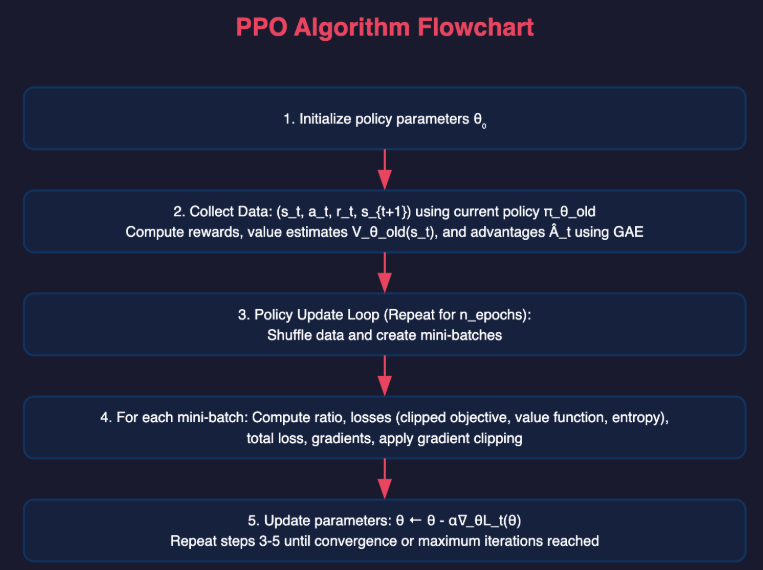
1. **Initialize** policy parameters $\theta_0$.

2. **Collect Data:**
   - For each environment (total `num_envs`), collect `n_steps` transitions $(s_t, a_t, r_t, s_{t+1})$ using current policy $\pi_{\theta_{\text{old}}}$.
   - Compute rewards, value estimates $V_{\theta_{\text{old}}}(s_t)$, and advantages $\hat{A}_t$ using GAE.

3. **Policy Update Loop** (Repeat for `n_epochs`):
   - Shuffle data and create mini-batches of size `batch_size`.
   - For each mini-batch:
     a) Compute probability ratio: $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{\text{old}}}(a_t|s_t)}$
     
     b) Compute losses:
        - Clipped objective: $L_t^{\text{CLIP}}(\theta) = \min( r_t(\theta) \hat{A}_t, \text{clip}( r_t(\theta), 1 - \epsilon, 1 + \epsilon ) \hat{A}_t )$
        - Value function: $L_t^{\text{VF}}(\theta) = ( V_\theta(s_t) - V_{\text{target}}(s_t) )^2$
        - Entropy bonus: $S[\pi_\theta](s_t) = -\sum_a \pi_\theta(a|s_t) \log \pi_\theta(a|s_t)$
     
     c) Compute total loss:
        $L_t(\theta) = -L_t^{\text{CLIP}}(\theta) + c_{\text{vf}} L_t^{\text{VF}}(\theta) - c_{\text{entropy}} S[\pi_\theta](s_t)$
     
     d) Compute gradients: $\nabla_\theta L_t(\theta)$
     
     e) Apply gradient clipping if $\| \nabla_\theta L_t(\theta) \| > \text{max\_grad\_norm}$
     
     f) Update parameters: $\theta \leftarrow \theta - \alpha \nabla_\theta L_t(\theta)$, where $\alpha$ is the learning rate

**Key Components:**
- **Clipping:** Limits policy updates to stabilize learning.
- **Value Function:** Estimates state values to compute advantages.
- **Entropy Bonus:** Encourages exploration by rewarding policy randomness.
- **Gradient Clipping:** Prevents extreme parameter updates.

**Note:** The negative sign before $L_t^{\text{CLIP}}(\theta)$ in the total loss is because we're minimizing the loss (equivalent to maximizing the PPO objective).

#### Evaluation

Let's test out the trained PPO model and see how it goes!

In [ ]:
# Load the saved model
# model = PPO.load("./ppo_models/pong_ppo_early.zip")
model = PPO.load("./ppo_models/pong_ppo_best.zip")

# Create and wrap the environment
env = make_atari_env("PongNoFrameskip-v4", n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

# Run the model
obs = env.reset()
for _ in range(5000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render("human")

    if dones:
        obs = env.reset()

env.close()

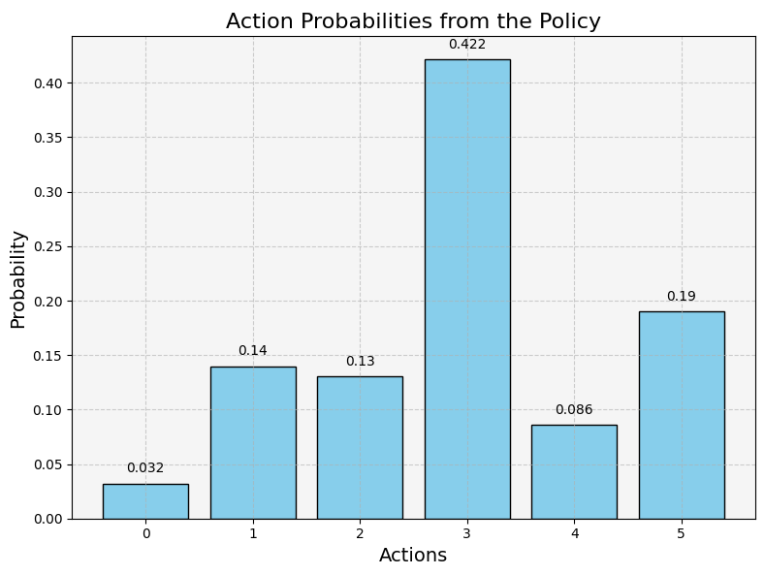

The PPO model has learned to **output a probability distribution** over actions for any given state, instead of directly estimating action values like in **Q-learning** or **DQN**.
The **action probabilities** shown in the plot represent how likely the agent (PPO model) is to take each of the possible actions based on the current observation (state) in the Pong game.

1. **Action 0 (NOOP)**: **Probability ~ 0.032**: The agent assigns a **low probability** (~3.2%) to taking no action. This suggests the agent doesn't consider staying still as a good option in the current state.
   
2. **Action 1 (FIRE)**: **Probability ~ 0.14**: The agent gives **~14% probability** to the "FIRE" action, which in Pong is typically used to serve the ball or start the game. This suggests that the agent considers this action but isn't confident that it's the best option.

3. **Action 2 (RIGHT)**: **Probability ~ 0.13**: Moving the paddle to the right has a **13% probability**, indicating the agent is considering this as a valid option but isn't strongly inclined to move right in this specific state.

4. **Action 3 (LEFT)**: **Probability ~ 0.42**: The agent assigns the **highest probability** (42%) to moving the paddle to the left. This means the agent is quite confident that moving left is the best action to take in this particular game state.

5. **Action 4 (RIGHTFIRE)**: **Probability ~ 0.086**: The combination of moving right and firing has a lower probability (~8.6%). The agent considers this action but doesn't view it as the most beneficial option in the current state.

6. **Action 5 (LEFTFIRE)**: **Probability ~ 0.19**: Moving left and firing has a **moderate probability** (~19%). This shows that the agent considers this as a possible action, but it gives higher priority to moving left without firing.

---
# Closing Thoughts & LLM Tie Back
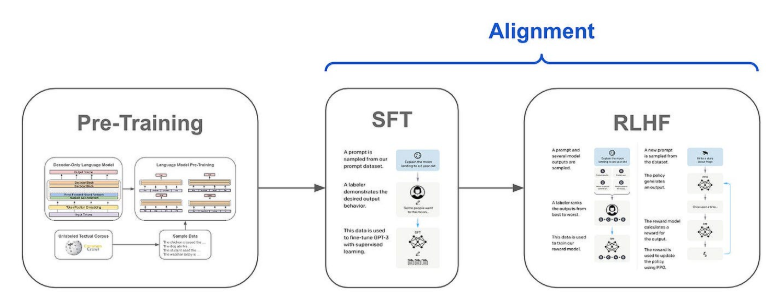
Reinforcement learning (RL) is the key to iteratively improving large language models (LLMs), primarily through **Reinforcement Learning from Human Feedback (RLHF)**. As an overview the process follows:

1. **Pre-training and Supervised Fine-Tuning**: LLMs are first pre-trained on large datasets to learn language patterns. They are then fine-tuned using supervised learning with labeled/human-curated input-output examples.
   
2. **Human Feedback**: Humans rank multiple responses from the model based on quality, correctness, and helpfulness. This feedback is used to train a **reward model** that predicts the quality of future outputs.

3. **Reinforcement Learning Fine-Tuning**: The language model is fine-tuned using RL algorithms (like **PPO**), where the model generates responses, and the reward model scores them. The RL algorithm adjusts the model to maximize these scores, aligning it with human preferences.

**Goals**:
- **Human Alignment**: RLHF helps models align better with human values and generate more helpful, accurate, and safe responses.
- **Improved Quality**: It enhances response quality by optimizing for human preferences.